# Capstone Project Data Science IBM Course

## Analysis of the Data

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### read data into panda dataframe

In [2]:
# already downloaded from internet manually
df_col = pd.read_csv('col_data.csv')
df_col.head()

/Users/christianpopsel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df_col.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
df_col.nunique()

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE           115
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

### Data Wrangling and Analysis

In [5]:
#get rid of all uneccesary columns
used_columns = ['SEVERITYCODE','X','Y','ADDRTYPE','INCDTTM','WEATHER','ROADCOND','LIGHTCOND']
df_col = df_col[used_columns]
df_col.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,Intersection,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,Block,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,Block,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,Block,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,2,-122.306426,47.545739,Intersection,1/28/2004 8:04:00 AM,Raining,Wet,Daylight


In [6]:
df_col.count()

SEVERITYCODE    194673
X               189339
Y               189339
ADDRTYPE        192747
INCDTTM         194673
WEATHER         189592
ROADCOND        189661
LIGHTCOND       189503
dtype: int64

In [7]:
# drop all lines where there is a NaN value
df_col = df_col.dropna()
df_col.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,Intersection,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,Block,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,Block,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,Block,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,2,-122.306426,47.545739,Intersection,1/28/2004 8:04:00 AM,Raining,Wet,Daylight


In [8]:
df_col.dtypes

SEVERITYCODE      int64
X               float64
Y               float64
ADDRTYPE         object
INCDTTM          object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

In [9]:
#check for unique values in Dataset
df_col.nunique()

SEVERITYCODE         2
X                23398
Y                23671
ADDRTYPE             2
INCDTTM         155840
WEATHER             11
ROADCOND             9
LIGHTCOND            9
dtype: int64

Note, that the severity code only has two unique values, 1 = propery damage and 2=injuries

In [10]:
df_col.shape

(184167, 8)

In [11]:
#strip all trailing white spaces from column names
df_col.columns = df_col.columns.str.strip()

In [12]:
#get_dummies for all object type values except DATETIME column
cols_for_dummies = ['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
df_col_dum = pd.get_dummies(df_col[cols_for_dummies])
df_col_dum.head()

,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [13]:
df_col_dum.columns

Index(['ADDRTYPE_Block', 'ADDRTYPE_Intersection', 'WEATHER_Blowing Sand/Dirt',
       'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other',
       'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining',
       'WEATHER_Severe Crosswind', 'WEATHER_Sleet/Hail/Freezing Rain',
       'WEATHER_Snowing', 'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice',
       'ROADCOND_Oil', 'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt',
       'ROADCOND_Snow/Slush', 'ROADCOND_Standing Water', 'ROADCOND_Unknown',
       'ROADCOND_Wet', 'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'LIGHTCOND_Unknown'],
      dtype='object')

In [14]:
#concatenate dummies data frame with original dataframe
df_col = pd.concat([df_col,df_col_dum], axis = 1)

In [15]:
df_col.head(5)

,SEVERITYCODE,X,Y,ADDRTYPE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE_Block,ADDRTYPE_Intersection,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,-122.323148,47.703140,Intersection,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,0,1,...,1,0,0,0,0,0,1,0,0,0
1,1,-122.347294,47.647172,Block,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,-122.334540,47.607871,Block,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,-122.334803,47.604803,Block,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2,-122.306426,47.545739,Intersection,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,0,1,...,1,0,0,0,0,0,1,0,0,0


In [16]:
df_col.dtypes

SEVERITYCODE                            int64
X                                     float64
Y                                     float64
ADDRTYPE                               object
INCDTTM                                object
WEATHER                                object
ROADCOND                               object
LIGHTCOND                              object
ADDRTYPE_Block                          uint8
ADDRTYPE_Intersection                   uint8
WEATHER_Blowing Sand/Dirt               uint8
WEATHER_Clear                           uint8
WEATHER_Fog/Smog/Smoke                  uint8
WEATHER_Other                           uint8
WEATHER_Overcast                        uint8
WEATHER_Partly Cloudy                   uint8
WEATHER_Raining                         uint8
WEATHER_Severe Crosswind                uint8
WEATHER_Sleet/Hail/Freezing Rain        uint8
WEATHER_Snowing                         uint8
WEATHER_Unknown                         uint8
ROADCOND_Dry                      

In [17]:
# drop columns 

df_col = df_col.drop(columns=cols_for_dummies, axis = 1)
df_col.dtypes


SEVERITYCODE                            int64
X                                     float64
Y                                     float64
INCDTTM                                object
ADDRTYPE_Block                          uint8
ADDRTYPE_Intersection                   uint8
WEATHER_Blowing Sand/Dirt               uint8
WEATHER_Clear                           uint8
WEATHER_Fog/Smog/Smoke                  uint8
WEATHER_Other                           uint8
WEATHER_Overcast                        uint8
WEATHER_Partly Cloudy                   uint8
WEATHER_Raining                         uint8
WEATHER_Severe Crosswind                uint8
WEATHER_Sleet/Hail/Freezing Rain        uint8
WEATHER_Snowing                         uint8
WEATHER_Unknown                         uint8
ROADCOND_Dry                            uint8
ROADCOND_Ice                            uint8
ROADCOND_Oil                            uint8
ROADCOND_Other                          uint8
ROADCOND_Sand/Mud/Dirt            

In [18]:
#drop datetime and location, see report for explanation
df_col = df_col.drop(columns = ['INCDTTM'], axis=1)
df_col.head()


,SEVERITYCODE,X,Y,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,-122.323148,47.703140,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,1,-122.347294,47.647172,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,-122.334540,47.607871,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,-122.334803,47.604803,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,-122.306426,47.545739,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [19]:
df_col = df_col.drop(columns = ['X','Y'], axis=1)
df_col.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [20]:
df_col.shape

(184167, 32)

**delete rows where WEATHER_Other == 1, WEATHER_Unknown == 1, ROADCOND_Other==1, ROADCOND_Unknown==1, LIGHTCOND_Other==1, LIGHTCOND_Unknown==1**


In [21]:
df_col1 = df_col.drop(df_col[(df_col.WEATHER_Unknown == 1) | (df_col.WEATHER_Other == 1) | 
                            (df_col.ROADCOND_Other == 1) | (df_col.ROADCOND_Unknown == 1) |
                            (df_col.LIGHTCOND_Unknown == 1) | (df_col.LIGHTCOND_Other == 1)].index)


df_col1.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [22]:
df_col1.shape

(166217, 32)

In [23]:
df_col1.nunique()

SEVERITYCODE                          2
ADDRTYPE_Block                        2
ADDRTYPE_Intersection                 2
WEATHER_Blowing Sand/Dirt             2
WEATHER_Clear                         2
WEATHER_Fog/Smog/Smoke                2
WEATHER_Other                         1
WEATHER_Overcast                      2
WEATHER_Partly Cloudy                 2
WEATHER_Raining                       2
WEATHER_Severe Crosswind              2
WEATHER_Sleet/Hail/Freezing Rain      2
WEATHER_Snowing                       2
WEATHER_Unknown                       1
ROADCOND_Dry                          2
ROADCOND_Ice                          2
ROADCOND_Oil                          2
ROADCOND_Other                        1
ROADCOND_Sand/Mud/Dirt                2
ROADCOND_Snow/Slush                   2
ROADCOND_Standing Water               2
ROADCOND_Unknown                      1
ROADCOND_Wet                          2
LIGHTCOND_Dark - No Street Lights     2
LIGHTCOND_Dark - Street Lights Off    2


In [24]:
df_col=df_col1

In [25]:
#drop unknown/other columns
unknown_other_columns = ['WEATHER_Unknown', 'WEATHER_Other', 'ROADCOND_Other', 'ROADCOND_Unknown', 'LIGHTCOND_Unknown', 'LIGHTCOND_Other']
df_col = df_col.drop(columns=unknown_other_columns, axis=1)

In [26]:
df_col.nunique()

SEVERITYCODE                          2
ADDRTYPE_Block                        2
ADDRTYPE_Intersection                 2
WEATHER_Blowing Sand/Dirt             2
WEATHER_Clear                         2
WEATHER_Fog/Smog/Smoke                2
WEATHER_Overcast                      2
WEATHER_Partly Cloudy                 2
WEATHER_Raining                       2
WEATHER_Severe Crosswind              2
WEATHER_Sleet/Hail/Freezing Rain      2
WEATHER_Snowing                       2
ROADCOND_Dry                          2
ROADCOND_Ice                          2
ROADCOND_Oil                          2
ROADCOND_Sand/Mud/Dirt                2
ROADCOND_Snow/Slush                   2
ROADCOND_Standing Water               2
ROADCOND_Wet                          2
LIGHTCOND_Dark - No Street Lights     2
LIGHTCOND_Dark - Street Lights Off    2
LIGHTCOND_Dark - Street Lights On     2
LIGHTCOND_Dark - Unknown Lighting     2
LIGHTCOND_Dawn                        2
LIGHTCOND_Daylight                    2


In [27]:
df_col.reset_index()
df_col.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,...,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
0,2,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [28]:
df_col.shape

(166217, 26)

### Visualize data

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt

**Complete Data Set**

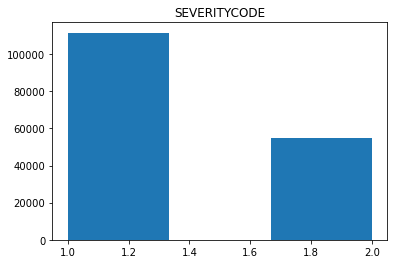

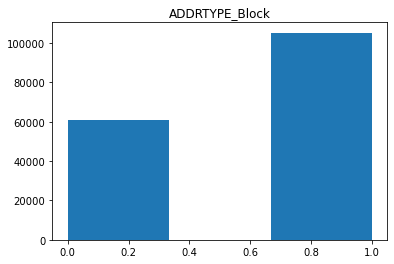

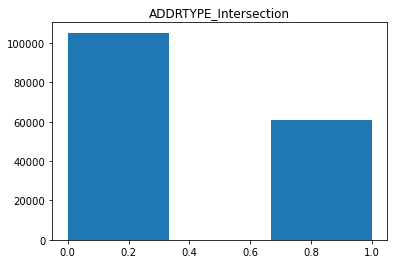

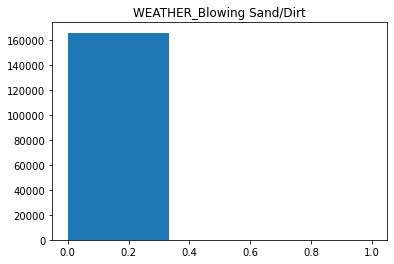

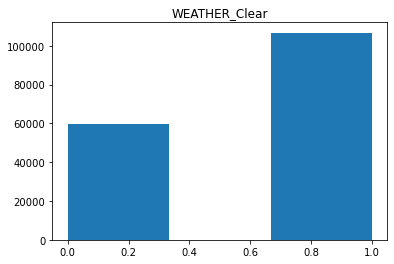

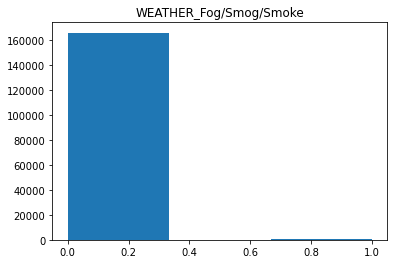

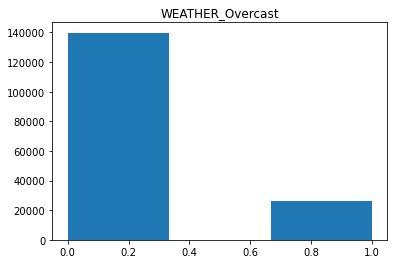

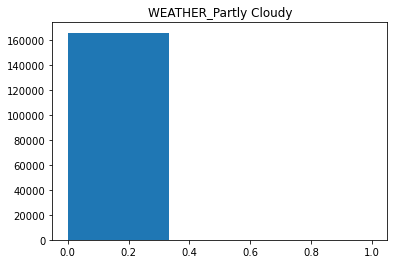

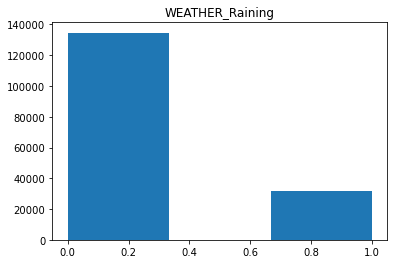

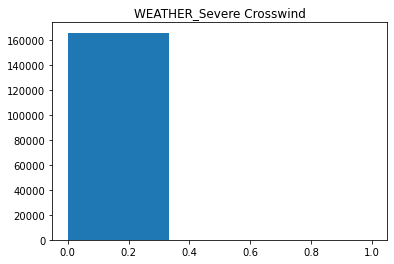

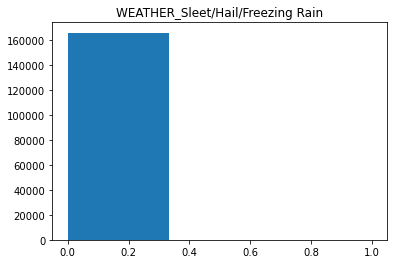

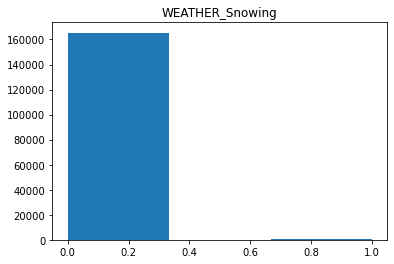

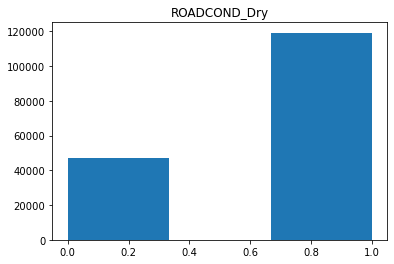

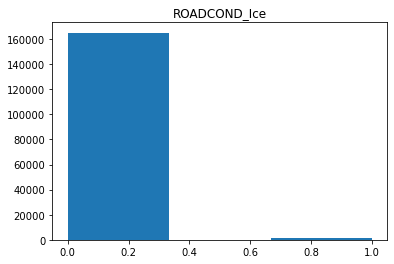

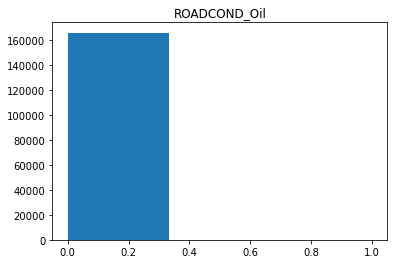

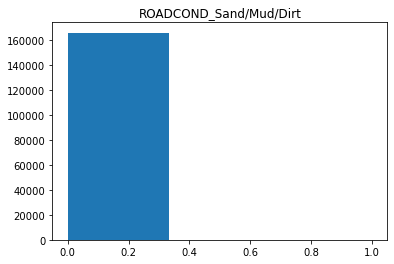

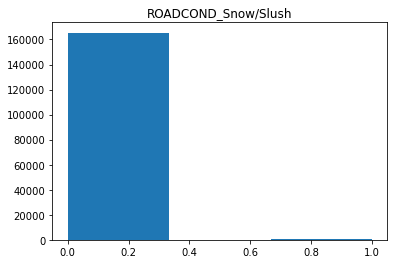

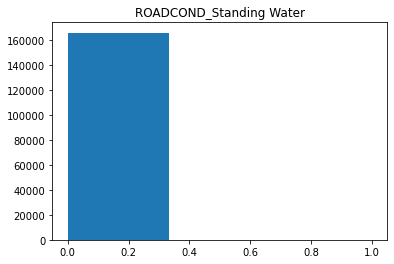

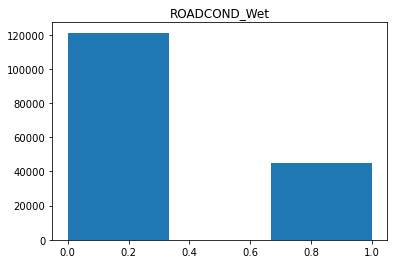

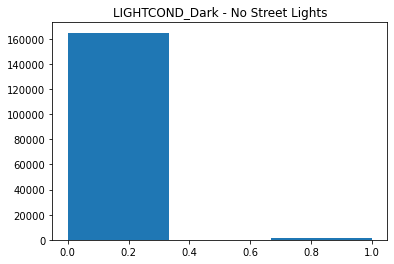

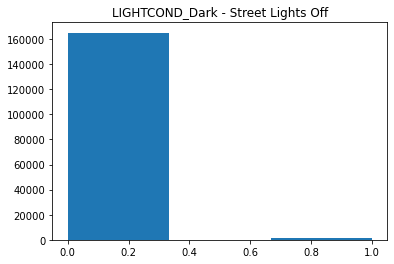

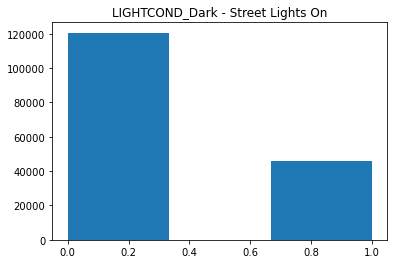

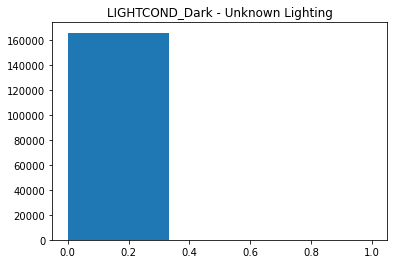

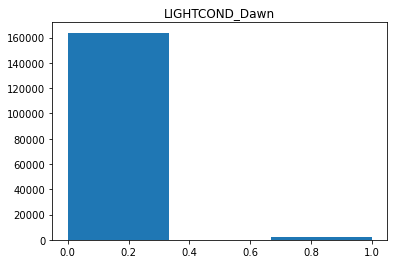

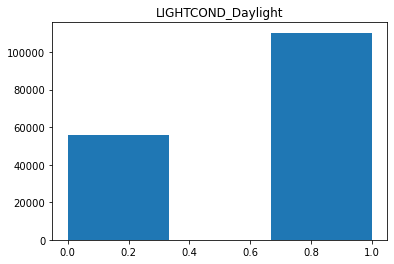

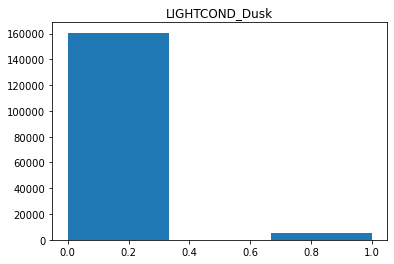

In [49]:
for (columnName, columnData) in df_col.iteritems():
    ax = plt.hist(columnData, bins=3)
    plt.title(columnName)
    plt.show()
    

**Data of type 1 incident**

In [52]:
df_col_type1 = df_col[df_col.SEVERITYCODE == 1]
df_col_type1.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,...,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
1,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [53]:
df_col_type1.shape

(111503, 26)

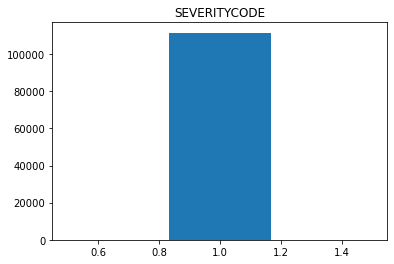

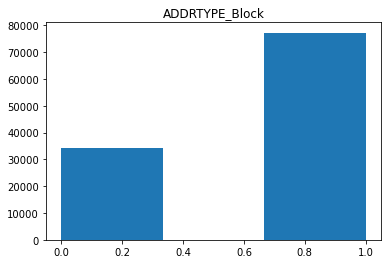

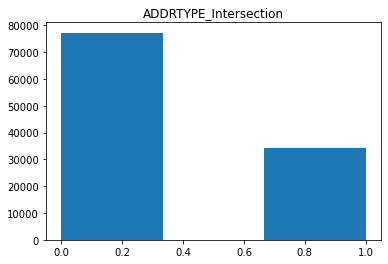

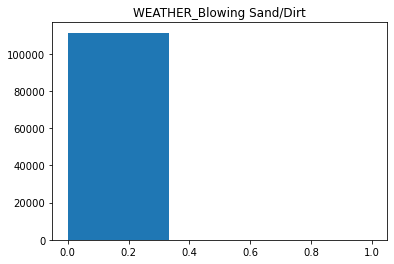

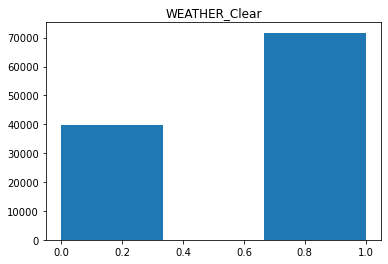

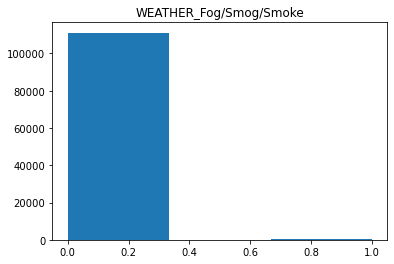

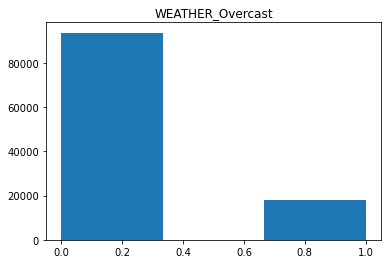

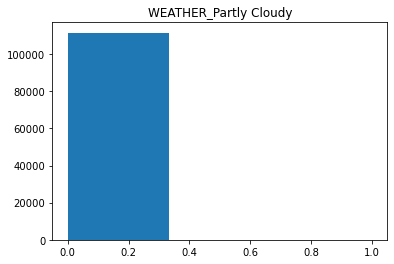

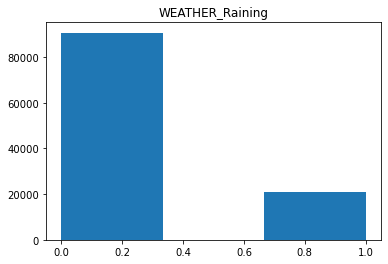

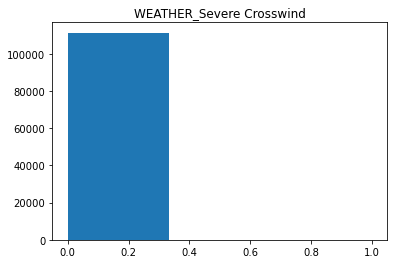

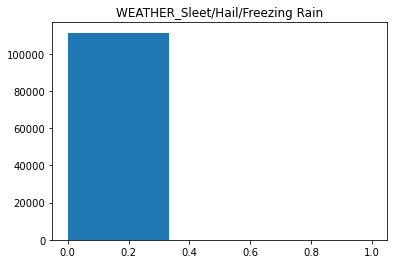

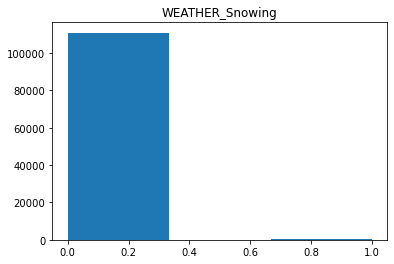

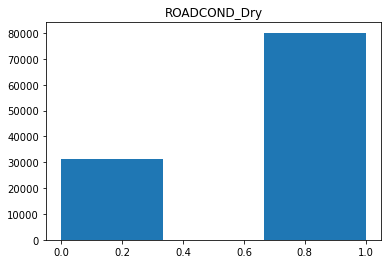

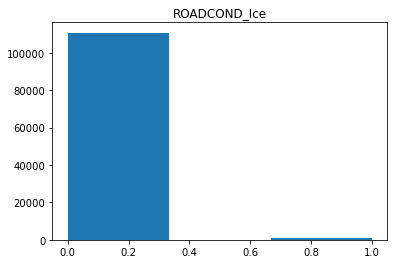

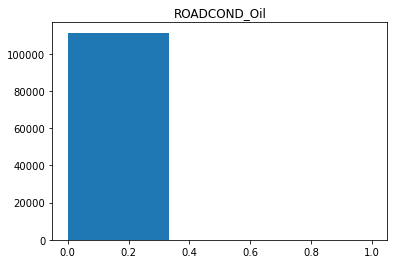

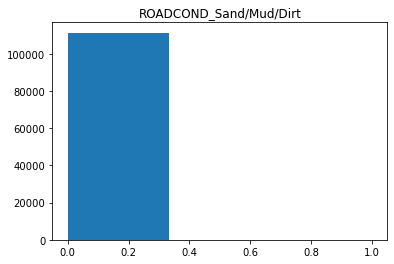

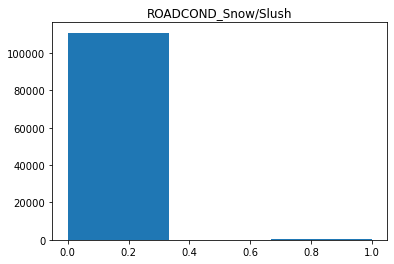

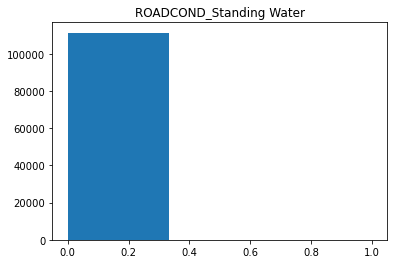

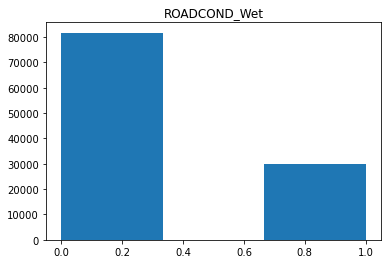

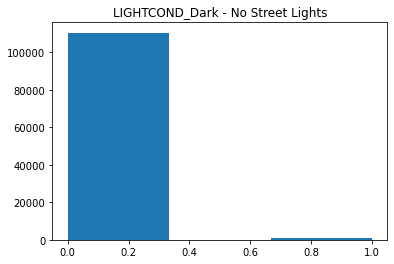

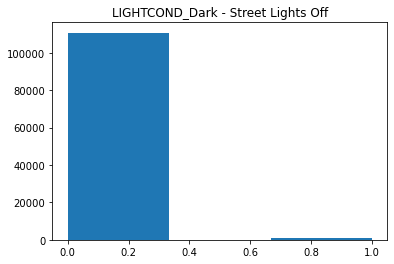

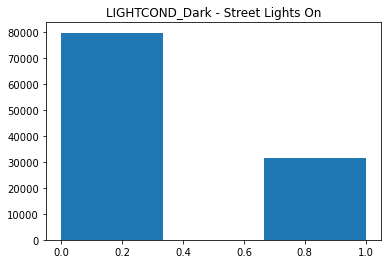

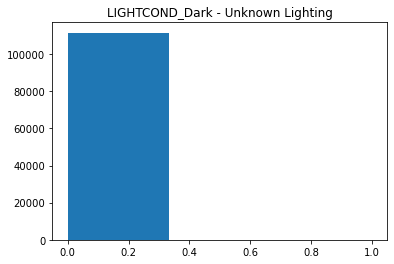

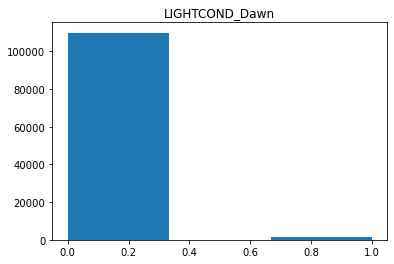

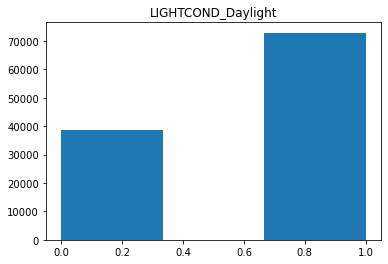

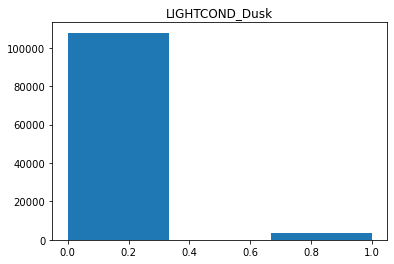

In [54]:
for (columnName, columnData) in df_col_type1.iteritems():
    ax = plt.hist(columnData, bins=3)
    plt.title(columnName)
    plt.show()

**for collisions type 2**

In [58]:
df_col_type2 = df_col[df_col.SEVERITYCODE == 2]
df_col_type2.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,...,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
0,2,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
7,2,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,2,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
df_col_type2.shape

(54714, 26)

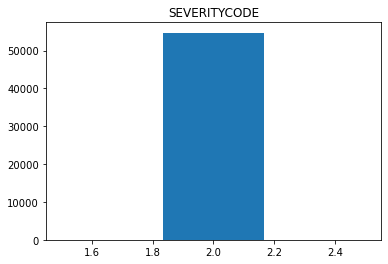

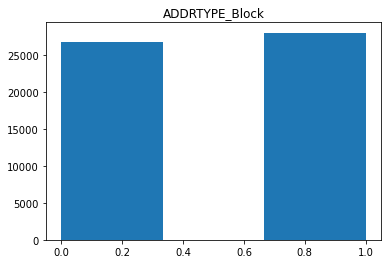

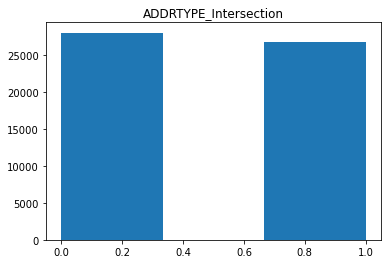

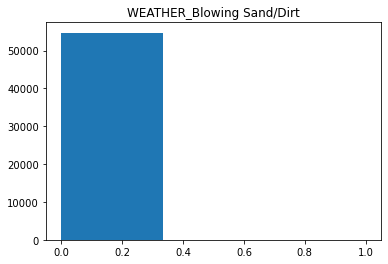

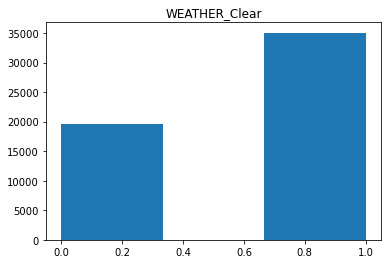

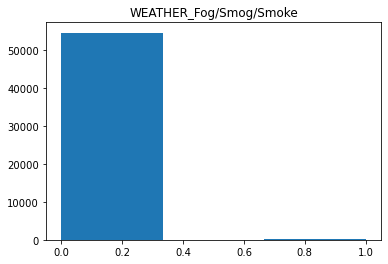

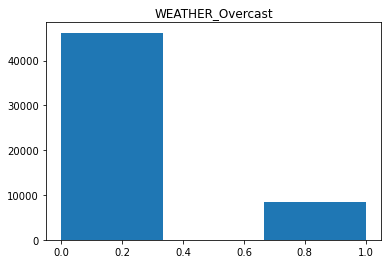

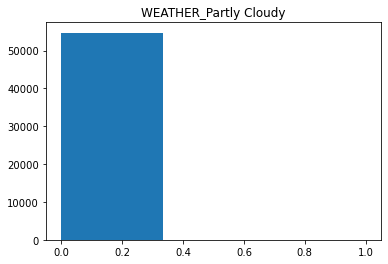

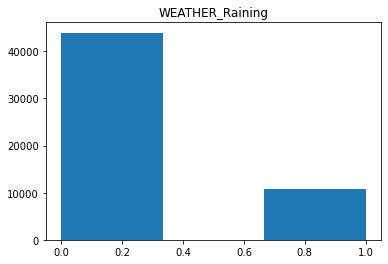

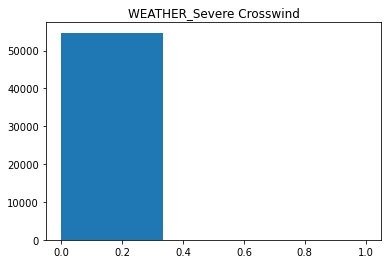

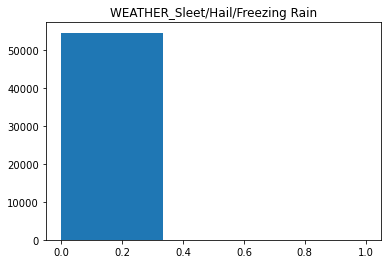

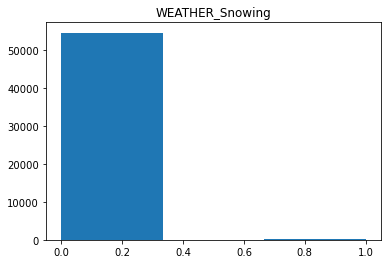

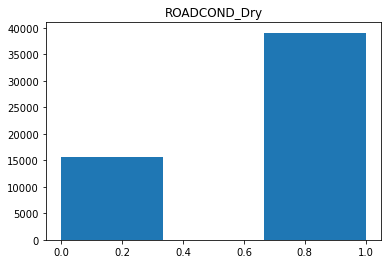

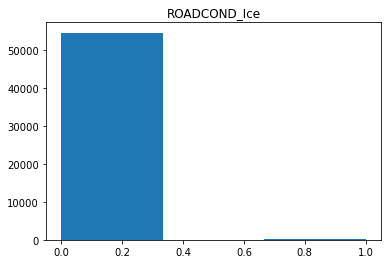

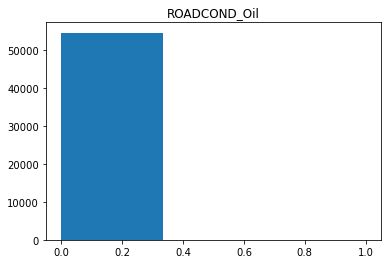

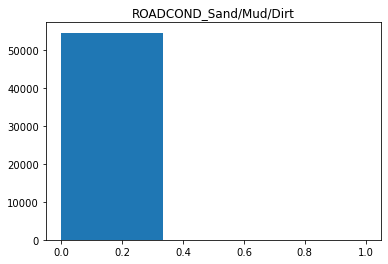

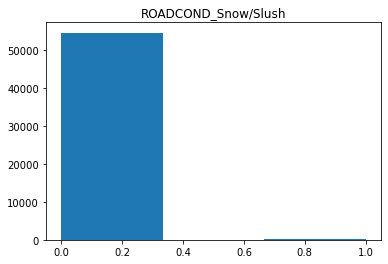

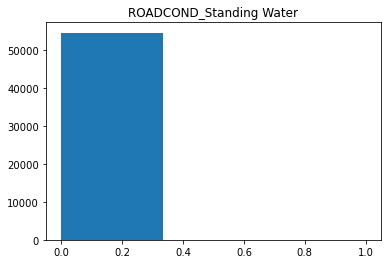

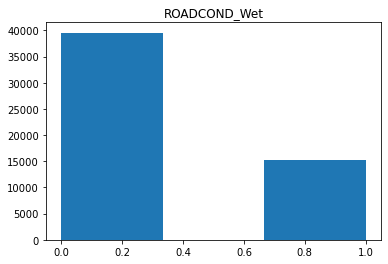

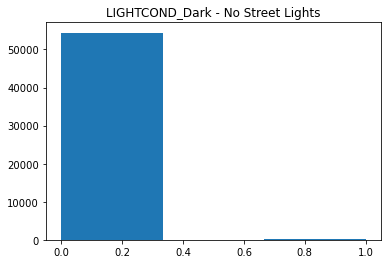

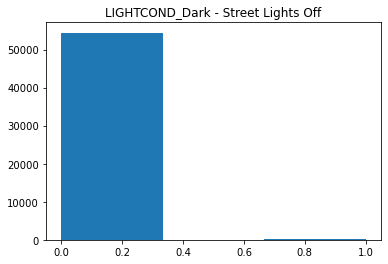

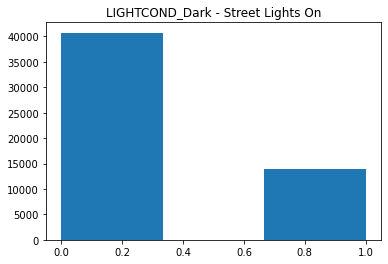

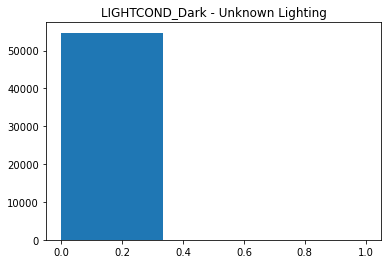

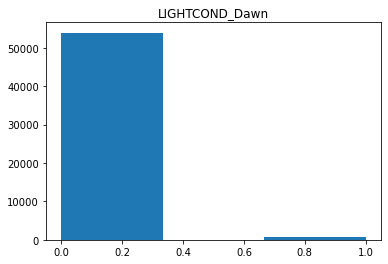

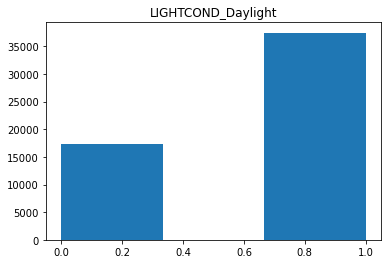

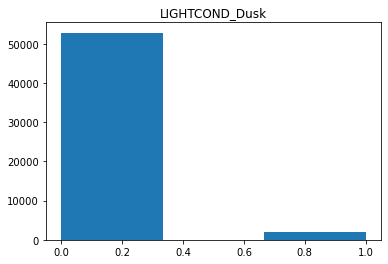

In [60]:
for (columnName, columnData) in df_col_type2.iteritems():
    ax = plt.hist(columnData, bins=3)
    plt.title(columnName)
    plt.show()

## Prediction Models

### We are going to try a decission tree, k-nearest neighbours and Logistic regression

### Data Preperation

**Normalization is not needed, since all values are categorical**